In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

In [50]:
df = yf.download(tickers = 'M&M.NS', start = '2022-01-01', end = '2022-05-31')

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Price')

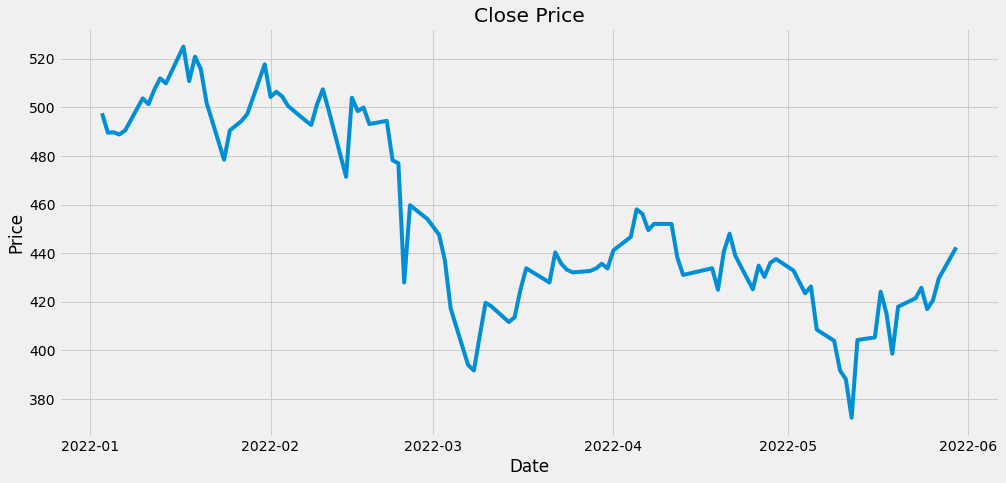

In [51]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,7))
plt.plot(df.Close)
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price')

In [52]:
max_price = df.Close.max()
min_price = df.Close.min()

difference = max_price - min_price
first_level = max_price - difference * 0.236
second_level = max_price - difference * 0.382
third_level = max_price - difference * 0.5
fourth_level = max_price - difference * 0.618

In [53]:
ema12 = df.Close.ewm(span = 12, adjust = False).mean()
ema26 = df.Close.ewm(span = 26, adjust = False).mean()
macd = ema12 - ema26
signal = macd.ewm(span = 9, adjust = False).mean()

Text(0, 0.5, 'MACD')

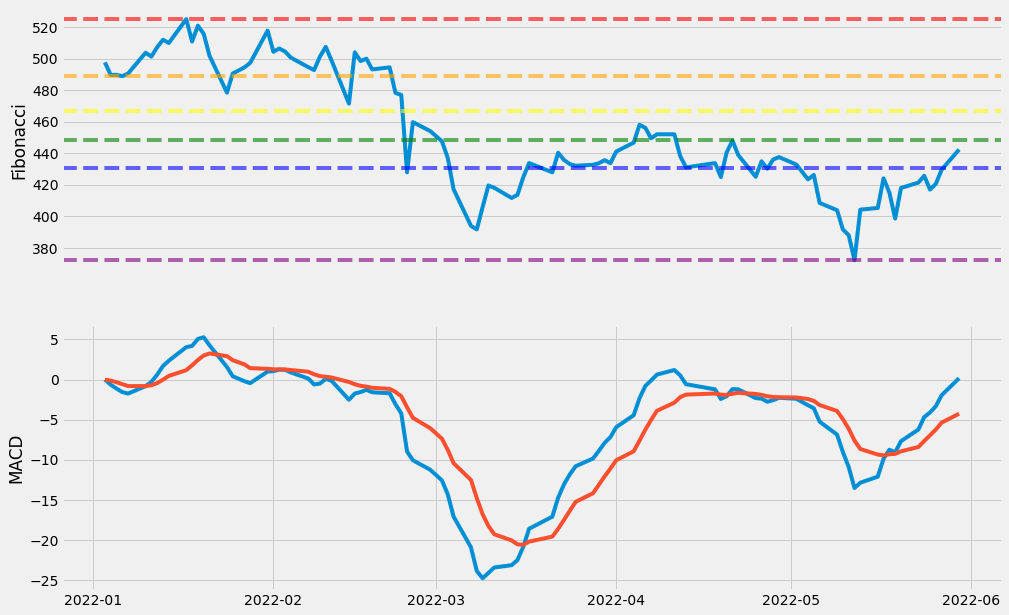

In [54]:
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
plt.plot(df.index,df.Close)
plt.axhline(max_price, linestyle = '--', alpha = 0.6, color = 'red')
plt.axhline(first_level, linestyle = '--', alpha = 0.6, color = 'orange')
plt.axhline(second_level, linestyle = '--', alpha = 0.6, color = 'yellow')
plt.axhline(third_level, linestyle = '--', alpha = 0.6, color = 'green')
plt.axhline(fourth_level, linestyle = '--', alpha = 0.6, color = 'blue')
plt.axhline(min_price, linestyle = '--', alpha = 0.6, color = 'purple')
plt.ylabel('Fibonacci')
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)

plt.subplot(2,1,2)
plt.plot(df.index, macd)
plt.plot(df.index, signal)
plt.ylabel('MACD')

In [55]:
df['MACD'] = macd
df['Signal Line'] = signal

In [56]:
def getlevels(price):
    if price >= first_level:
        return (max_price, first_level)
    
    elif price >= second_level:
        return (first_level, second_level)
    
    elif price >= third_level:
        return (second_level, third_level)
    
    elif price >= fourth_level:
        return (third_level, fourth_level)
    
    else:
        return (fourth_level, min_price)
    

In [57]:
def strategy(df):
    buy_list = []
    sell_list = []
    flag = 0
    last_buy_price = 0
    
    for i in range(0, df.shape[0]):
        price = df['Close'][i]
    
        if i == 0:
            upper_level, lower_level = getlevels(price)
            buy_list.append(np.nan)
            sell_list.append(np.nan)
        
        elif price >= upper_level or price <= lower_level:
        
            if df['Signal Line'][i] > df['MACD'][i] and flag == 0:
                last_buy_price = price
                buy_list.append(price)
                sell_list.append(np.nan)
                flag = 1
            elif df['Signal Line'][i] < df['MACD'][i] and flag == 1 and price >= last_buy_price:
                buy_list.append(np.nan)
                sell_list.append(price)
                flag = 0
        
            else:
                buy_list.append(np.nan)
                sell_list.append(np.nan)
            
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
        
        
        upper_level, lower_level = getlevels(price)

    return buy_list, sell_list

In [58]:
buy, sell = strategy(df)
df['Buy_Signal_Price'] = buy
df['Sell_Signal_Price'] = sell

#df.drop(columns = 'Sell_seignal_Price', inplace = True)

In [59]:
df

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2022-01-03,493.500000,500.850006,492.000000,497.600006,497.600006,32748423,0.000000,0.000000,NaN,NaN
2022-01-04,496.799988,499.000000,484.049988,489.600006,489.600006,24100985,-0.638177,-0.127635,NaN,NaN
2022-01-05,486.950012,492.750000,483.549988,489.750000,489.750000,15420105,-1.118935,-0.325895,NaN,NaN
2022-01-06,481.500000,492.950012,477.100006,488.850006,488.850006,16563230,-1.554640,-0.571644,488.850006,NaN
2022-01-07,490.049988,495.500000,483.750000,490.600006,490.600006,15532165,-1.738686,-0.805053,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-05-24,423.899994,427.500000,416.000000,425.750000,425.750000,14525617,-4.663180,-7.645283,NaN,NaN
2022-05-25,428.450012,429.000000,413.450012,417.000000,417.000000,13540006,-4.092161,-6.934659,NaN,NaN
2022-05-26,422.000000,422.649994,405.000000,420.649994,420.649994,17712299,-3.306979,-6.209123,NaN,NaN


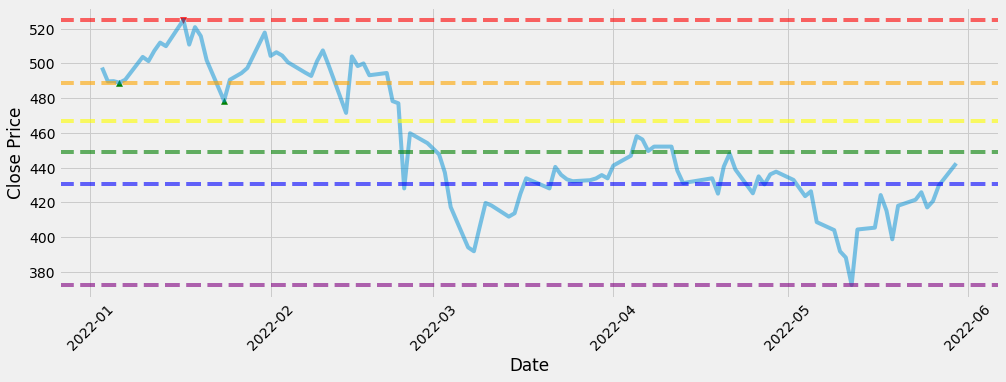

In [60]:
plt.figure(figsize = (15,5))
plt.plot(df.index,df.Close, alpha = 0.5)
plt.scatter(df.index, df.Buy_Signal_Price, color = 'green', marker = '^', alpha = 1)
plt.scatter(df.index, df.Sell_Signal_Price, color = 'red', marker = 'v', alpha = 1)
plt.axhline(max_price, linestyle = '--', alpha = 0.6, color = 'red')
plt.axhline(first_level, linestyle = '--', alpha = 0.6, color = 'orange')
plt.axhline(second_level, linestyle = '--', alpha = 0.6, color = 'yellow')
plt.axhline(third_level, linestyle = '--', alpha = 0.6, color = 'green')
plt.axhline(fourth_level, linestyle = '--', alpha = 0.6, color = 'blue')
plt.axhline(min_price, linestyle = '--', alpha = 0.6, color = 'purple')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.show()